In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mikulhe/3d-printing-errors

100% 104M/104M [00:06<00:00, 23.7MB/s] 
100% 104M/104M [00:06<00:00, 18.2MB/s]


In [3]:
!unzip \*.zip

Archive:  3d-printing-errors.zip
  inflating: OK/01s8lOzd24t1s3pHCdDtLUA-1.fit_lim.size_1050x.jpg  
  inflating: OK/01s8lOzd24t1s3pHCdDtLUA-8..v1569485513.jpg  
  inflating: OK/1226899_81_111236_gTOoP6wNM.jpg  
  inflating: OK/2.-Can-Bomb.jpg      
  inflating: OK/2rtlwsmpm1m81.jpg    
  inflating: OK/3-d_printing.jpg     
  inflating: OK/3D-Printing-Is-Changing-the-Global-Manufacturing-Landscape.jpg  
  inflating: OK/3D-dPrinting.jpg     
  inflating: OK/3D-printer-4.jpg     
  inflating: OK/3D-printer-photos-2020-2x1-lowres9405-1024x512-1.jpg  
  inflating: OK/3D-printing (1).jpg  
  inflating: OK/3D-printing-is-revolutionizing-education.jpg  
  inflating: OK/3ah4sfvny2m81.jpg    
  inflating: OK/3d-printed-files-scaled-1.jpg  
  inflating: OK/3d-printer---hand.jpg  
  inflating: OK/3d-printers_resize_md.jpg  
  inflating: OK/3d-printing-materials-600x375.jpg  
  inflating: OK/3d-printing-technology.jpg  
  inflating: OK/3d-printing.jpg      
  inflating: OK/3d.jpg               
  i

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
folders = ['OK', 'blobs', 'cracks', 'stringing', 'spaghetti', 'under exstrosion']

In [6]:
labels = np.arange(len(folders))

In [7]:
folder_paths = [os.path.join('/content/Images', folder) for folder in folders]


In [31]:
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize the image to 224x224 pixels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB format
        images.append(img)
        labels.append(label)
    return images, labels

In [32]:
images = []
all_labels = []
for folder_path, label in zip(folder_paths, labels):
    folder_images, folder_labels = load_images(folder_path, label)
    images.extend(folder_images)
    all_labels.extend(folder_labels)

In [35]:
# Convert images and labels to numpy arrays
images = np.array(images)
all_labels = np.array(all_labels)

In [76]:
all_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [36]:
# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, all_labels, test_size=0.2, random_state=42)

In [37]:
# Calculate class weights
class_weights = dict(enumerate(len(train_labels) / (len(folders) * np.bincount(train_labels))))

In [38]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # preprocessing_function=lambda img: cv2.cvtColor(cv2.Canny(cv2.GaussianBlur(img.astype(np.uint8), (5, 5), 0), 100, 200), cv2.COLOR_GRAY2RGB)  # Apply Canny edge detection after Gaussian blur
)

In [39]:
datagen.fit(train_images)

In [40]:
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [41]:
# Load the pre-trained models without the top layer
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [42]:
# Add a custom top layer for each model
resnet_x = resnet_base_model.output
resnet_x = GlobalAveragePooling2D()(resnet_x)
resnet_x = Dense(64, activation='relu')(resnet_x)
resnet_x = Dropout(0.5)(resnet_x)
resnet_predictions = Dense(len(folders), activation='softmax')(resnet_x)

In [43]:
inception_x = inception_base_model.output
inception_x = GlobalAveragePooling2D()(inception_x)
inception_x = Dense(64, activation='relu')(inception_x)
inception_x = Dropout(0.5)(inception_x)
inception_predictions = Dense(len(folders), activation='softmax')(inception_x)

In [44]:
vgg_x = vgg_base_model.output
vgg_x = GlobalAveragePooling2D()(vgg_x)
vgg_x = Dense(64, activation='relu')(vgg_x)
vgg_x = Dropout(0.5)(vgg_x)
vgg_predictions = Dense(len(folders), activation='softmax')(vgg_x)

In [45]:
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_predictions)
inception_model = Model(inputs=inception_base_model.input, outputs=inception_predictions)
vgg_model = Model(inputs=vgg_base_model.input, outputs=vgg_predictions)


In [46]:
# Freeze the base layers of the pre-trained models
for layer in resnet_base_model.layers:
    layer.trainable = False

for layer in inception_base_model.layers:
    layer.trainable = False

for layer in vgg_base_model.layers:
    layer.trainable = False

In [52]:
resnet_model.compile(tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels), class_weight=class_weights)

Epoch 1/20
10/10 [==============================] - 8s 435ms/step - loss: 0.5241 - accuracy: 0.8103 - val_loss: 0.6158 - val_accuracy: 0.7436
Epoch 2/20
10/10 [==============================] - 5s 489ms/step - loss: 0.3956 - accuracy: 0.8810 - val_loss: 0.5508 - val_accuracy: 0.7564
Epoch 3/20
10/10 [==============================] - 4s 374ms/step - loss: 0.1906 - accuracy: 0.9100 - val_loss: 0.6835 - val_accuracy: 0.7564
Epoch 4/20
10/10 [==============================] - 4s 372ms/step - loss: 0.2899 - accuracy: 0.8810 - val_loss: 0.6295 - val_accuracy: 0.7436
Epoch 5/20
10/10 [==============================] - 5s 492ms/step - loss: 0.2858 - accuracy: 0.8907 - val_loss: 0.5985 - val_accuracy: 0.7308
Epoch 6/20
10/10 [==============================] - 4s 383ms/step - loss: 0.2383 - accuracy: 0.9132 - val_loss: 0.6360 - val_accuracy: 0.7436
Epoch 7/20
10/10 [==============================] - 5s 456ms/step - loss: 0.1924 - accuracy: 0.9293 - val_loss: 0.6678 - val_accuracy: 0.7821
Epoch 

In [53]:
vgg_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels), class_weight=class_weights)

Epoch 1/20
10/10 [==============================] - 5s 372ms/step - loss: 0.9968 - accuracy: 0.6688 - val_loss: 1.3270 - val_accuracy: 0.6667
Epoch 2/20
10/10 [==============================] - 5s 493ms/step - loss: 0.8015 - accuracy: 0.7203 - val_loss: 1.1399 - val_accuracy: 0.7051
Epoch 3/20
10/10 [==============================] - 4s 388ms/step - loss: 0.7799 - accuracy: 0.7428 - val_loss: 1.1735 - val_accuracy: 0.7308
Epoch 4/20
10/10 [==============================] - 4s 398ms/step - loss: 0.6126 - accuracy: 0.7492 - val_loss: 1.1877 - val_accuracy: 0.6667
Epoch 5/20
10/10 [==============================] - 5s 468ms/step - loss: 0.6413 - accuracy: 0.7685 - val_loss: 1.2969 - val_accuracy: 0.6282
Epoch 6/20
10/10 [==============================] - 5s 457ms/step - loss: 0.5245 - accuracy: 0.7395 - val_loss: 1.1472 - val_accuracy: 0.7564
Epoch 7/20
10/10 [==============================] - 5s 475ms/step - loss: 0.5639 - accuracy: 0.7814 - val_loss: 1.2220 - val_accuracy: 0.6538
Epoch 

In [54]:
inception_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
inception_history = inception_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels), class_weight=class_weights)

Epoch 1/20
10/10 [==============================] - 9s 485ms/step - loss: 1.7922 - accuracy: 0.2090 - val_loss: 1.7922 - val_accuracy: 0.2308
Epoch 2/20
10/10 [==============================] - 5s 498ms/step - loss: 1.7921 - accuracy: 0.2669 - val_loss: 1.7923 - val_accuracy: 0.2308
Epoch 3/20
10/10 [==============================] - 4s 377ms/step - loss: 1.7920 - accuracy: 0.2058 - val_loss: 1.7922 - val_accuracy: 0.2308
Epoch 4/20
10/10 [==============================] - 4s 354ms/step - loss: 1.7922 - accuracy: 0.2669 - val_loss: 1.7919 - val_accuracy: 0.2308
Epoch 5/20
10/10 [==============================] - 5s 499ms/step - loss: 1.7920 - accuracy: 0.2669 - val_loss: 1.7919 - val_accuracy: 0.2308
Epoch 6/20
10/10 [==============================] - 4s 360ms/step - loss: 1.7920 - accuracy: 0.2669 - val_loss: 1.7918 - val_accuracy: 0.2308
Epoch 7/20
10/10 [==============================] - 4s 360ms/step - loss: 1.7919 - accuracy: 0.2669 - val_loss: 1.7917 - val_accuracy: 0.2308
Epoch 

In [56]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00


In [66]:
from efficientnet.tfkeras import EfficientNetB0
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

efficientnet_x = efficientnet_base_model.output
efficientnet_x = GlobalAveragePooling2D()(efficientnet_x)
efficientnet_x = Dense(64, activation='relu')(efficientnet_x)
efficientnet_x = Dropout(0.5)(efficientnet_x)
efficientnet_predictions = Dense(len(folders), activation='softmax')(efficientnet_x)

efficientnet_model = Model(inputs=efficientnet_base_model.input, outputs=efficientnet_predictions)

efficientnet_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
efficientnet_history = efficientnet_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels), class_weight=class_weights)

Epoch 1/20
10/10 [==============================] - 43s 510ms/step - loss: 1.4139 - accuracy: 0.4984 - val_loss: 2.8234 - val_accuracy: 0.3590
Epoch 2/20
10/10 [==============================] - 6s 556ms/step - loss: 0.6983 - accuracy: 0.7492 - val_loss: 1.6940 - val_accuracy: 0.3590
Epoch 3/20
10/10 [==============================] - 6s 553ms/step - loss: 0.3940 - accuracy: 0.8875 - val_loss: 1.7424 - val_accuracy: 0.4615
Epoch 4/20
10/10 [==============================] - 4s 428ms/step - loss: 0.2464 - accuracy: 0.9293 - val_loss: 1.7315 - val_accuracy: 0.5641
Epoch 5/20
10/10 [==============================] - 5s 458ms/step - loss: 0.2278 - accuracy: 0.9389 - val_loss: 1.4106 - val_accuracy: 0.5769
Epoch 6/20
10/10 [==============================] - 6s 544ms/step - loss: 0.2124 - accuracy: 0.9325 - val_loss: 2.5392 - val_accuracy: 0.5385
Epoch 7/20
10/10 [==============================] - 6s 547ms/step - loss: 0.2365 - accuracy: 0.9228 - val_loss: 2.1603 - val_accuracy: 0.6538
Epoch

In [67]:
resnet_train_accuracy = resnet_history.history['accuracy']
resnet_test_accuracy = resnet_history.history['val_accuracy']

inception_train_accuracy = inception_history.history['accuracy']
inception_test_accuracy = inception_history.history['val_accuracy']

vgg_train_accuracy = vgg_history.history['accuracy']
vgg_test_accuracy = vgg_history.history['val_accuracy']

efficientnet_train_accuracy = efficientnet_history.history['accuracy']
efficientnet_test_accuracy = efficientnet_history.history['val_accuracy']

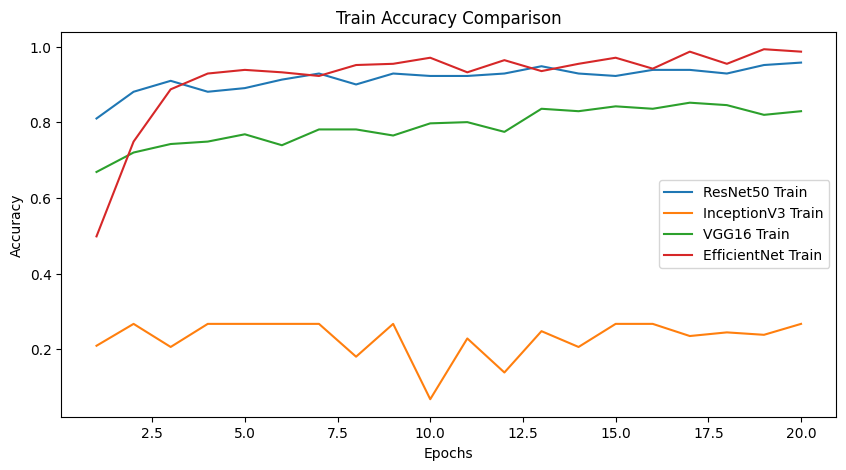

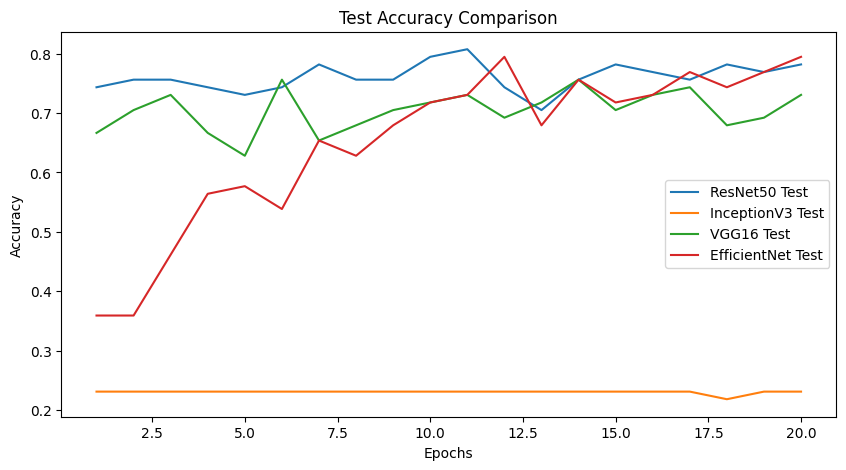

In [68]:
epochs = range(1, 21)
plt.figure(figsize=(10, 5))
plt.plot(epochs, resnet_train_accuracy, label='ResNet50 Train')
plt.plot(epochs, inception_train_accuracy, label='InceptionV3 Train')
plt.plot(epochs, vgg_train_accuracy, label='VGG16 Train')
plt.plot(epochs, efficientnet_train_accuracy, label='EfficientNet Train')
plt.title('Train Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, resnet_test_accuracy, label='ResNet50 Test')
plt.plot(epochs, inception_test_accuracy, label='InceptionV3 Test')
plt.plot(epochs, vgg_test_accuracy, label='VGG16 Test')
plt.plot(epochs, efficientnet_test_accuracy, label='EfficientNet Test')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3/3 [==============================] - 1s 66ms/step


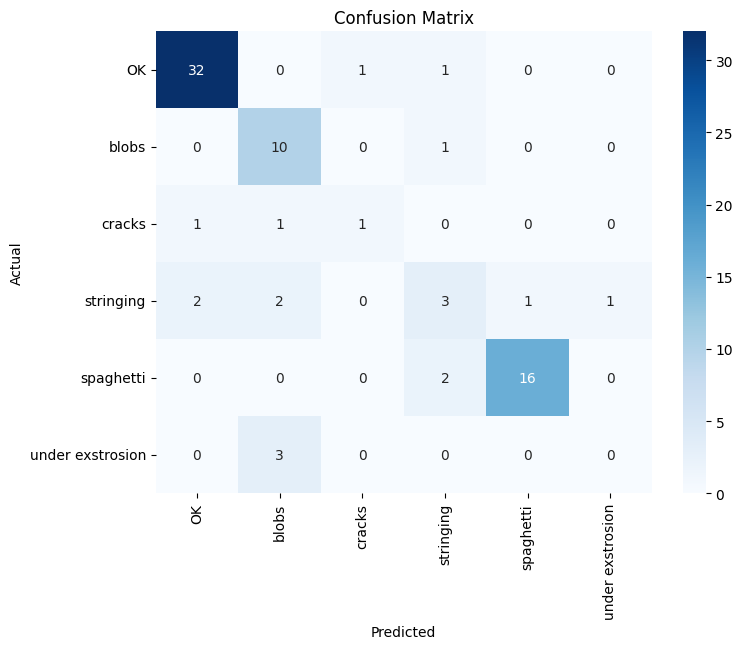

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = np.argmax(efficientnet_model.predict(test_images), axis=-1)

cm = confusion_matrix(test_labels, predictions)
class_labels =  ['OK', 'blobs', 'cracks', 'stringing', 'spaghetti', 'under exstrosion']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report

# Obtain predictions on the test set
predictions = np.argmax(efficientnet_model.predict(test_images), axis=-1)

# Calculate and print classification report
# Define class labels
class_labels =  ['OK', 'blobs', 'cracks', 'stringing', 'spaghetti', 'under exstrosion']
report = classification_report(test_labels, predictions, target_names=class_labels)
print(report)


3/3 [==============================] - 0s 53ms/step
                  precision    recall  f1-score   support

              OK       0.91      0.94      0.93        34
           blobs       0.62      0.91      0.74        11
          cracks       0.50      0.33      0.40         3
       stringing       0.43      0.33      0.38         9
       spaghetti       0.94      0.89      0.91        18
under exstrosion       0.00      0.00      0.00         3

        accuracy                           0.79        78
       macro avg       0.57      0.57      0.56        78
    weighted avg       0.77      0.79      0.78        78



In [71]:

# Obtain predictions on the test set
predictions = np.argmax(resnet_model.predict(test_images), axis=-1)

# Calculate and print classification report
# Define class labels
class_labels =  ['OK', 'blobs', 'cracks', 'stringing', 'spaghetti', 'under exstrosion']
report = classification_report(test_labels, predictions, target_names=class_labels)
print(report)


3/3 [==============================] - 0s 83ms/step
                  precision    recall  f1-score   support

              OK       0.81      0.88      0.85        34
           blobs       0.70      0.64      0.67        11
          cracks       0.50      0.33      0.40         3
       stringing       0.58      0.78      0.67         9
       spaghetti       1.00      0.89      0.94        18
under exstrosion       0.00      0.00      0.00         3

        accuracy                           0.78        78
       macro avg       0.60      0.59      0.59        78
    weighted avg       0.77      0.78      0.77        78



In [64]:
resnet_model.save_weights('/content/Images/resnet_model_weights.h5')
resnet_model.save('/content/Images/resnet_model.h5')

In [84]:
efficientnet_model.save_weights('/content/Images/efficient_model_weights.h5')
efficientnet_model.save('/content/Images/efficient_model.h5')

In [73]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/Images/efficient_model.h5')

In [88]:
# Load and preprocess the image you want to classify
image_path = '/content/Images/spaghetti/149918_fea6b7ad1f911b19fff8646791e3edc9.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0)

# Make predictions on the image using the loaded model
predictions = loaded_model.predict(image)

# # Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 4


In [90]:
folders = ['OK', 'blobs', 'cracks', 'stringing', 'spaghetti', 'under exstrosion']

In [91]:
folders[predicted_class]

'spaghetti'